# Analze Edeka Product Images

test products
- 4311501657256 - German sunflower seeds - wrong main language (en)

food-groups ???

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen, urlretrieve
from urllib.parse import urlencode
from pathlib import Path
import json
import math
from typing import Union
from slugify import slugify

In [2]:
scope = "de"
API_URL = f"https://{scope}.openfoodfacts.org/api/v2/search?"

PARAMS = {
    "page_size": 1000,
    "brands_tags": "Edeka",
    "sort_by": "unique_scans_n",
    "fields": "code,lang,product_name,product_name_de,images,selected_images,compared_to_category"
}

DATA_FILE = f"../data/off_{scope}_edeka_top1000_images.json"

# skip download if data has been downloaded before
if not Path(DATA_FILE).exists():
    urlretrieve(API_URL + urlencode(PARAMS), DATA_FILE)

In [3]:
# load json file
with open(DATA_FILE) as f:
    data = json.load(f)

# create data frame from product information
prod_df = (pd.DataFrame(data['products'])
            .set_index('code')
          )

display(prod_df)

,compared_to_category,images,lang,product_name,product_name_de,selected_images
code,,,,,,
4311501489819,en:uht-milks,"{'1': {'sizes': {'100': {'h': 100, 'w': 75}, '...",de,"H-Milch 1,5%","H-Milch 1,5%",{'front': {'display': {'de': 'https://images.o...
4311501489840,en:whole-milks,"{'1': {'sizes': {'100': {'h': 100, 'w': 75}, '...",de,H-Vollmilch,H-Vollmilch,{'front': {'display': {'de': 'https://images.o...
4311501695135,en:oat-milks,"{'1': {'sizes': {'100': {'h': 100, 'w': 75}, '...",de,Haferdrink Classic,Haferdrink Classic,{'front': {'display': {'de': 'https://images.o...
4311596440429,en:strained-tomatoes,"{'1': {'sizes': {'100': {'h': 100, 'w': 75}, '...",de,Tomaten passiert,Tomaten passiert,{'front': {'display': {'de': 'https://images.o...
4311501687734,en:cream-cheeses,"{'1': {'sizes': {'100': {'h': 100, 'w': 75}, '...",de,Käse Frischkäse Pur,Käse Frischkäse Pur,{'front': {'display': {'de': 'https://images.o...
...,...,...,...,...,...,...
4311501738764,en:frozen-mixed-fruits,"{'1': {'sizes': {'100': {'h': 95, 'w': 100}, '...",de,feine Beerenmischung mit Sauerkirschen,feine Beerenmischung mit Sauerkirschen,{'front': {'display': {'de': 'https://images.o...
4311501728109,NaN,"{'1': {'sizes': {'100': {'h': 100, 'w': 62}, '...",pt,Lieblingssaft,NaN,{'front': {'display': {'pt': 'https://images.o...
4311501486887,NaN,"{'1': {'sizes': {'100': {'h': 100, 'w': 67}, '...",de,Veganer Aufschnitt nach Art Salami,Veganer Aufschnitt nach Art Salami,{'front': {'display': {'de': 'https://images.o...


## Main Language

In [4]:
prod_df.lang.value_counts()

lang
de    913
en     63
fr     17
es      3
et      1
ar      1
fa      1
pt      1
Name: count, dtype: int64

In [5]:
# German Product name differs from default name
(prod_df.product_name != prod_df.product_name_de).value_counts()

False    928
True      72
Name: count, dtype: int64

## Categories

In [6]:
prod_df.compared_to_category.isna().value_counts()

compared_to_category
False    902
True      98
Name: count, dtype: int64

In [7]:
prod_df.compared_to_category.value_counts()

compared_to_category
en:groceries                      23
en:sausages                       13
en:cheeses                        12
en:yogurts                        11
en:buns                           10
                                  ..
en:corn-starch                     1
en:plant-based-meals               1
en:frozen-strawberries             1
en:sliced-champignon-mushrooms     1
en:frozen-mixed-fruits             1
Name: count, Length: 506, dtype: int64

In [8]:
prod_df.reset_index().sort_values(["compared_to_category", "code"], ascending=False).set_index(["compared_to_category", "code"])

images  \
compared_to_category        code                                                               
xx:fusilli                  4311596410620  {'1': {'sizes': {'100': {'h': 75, 'w': 100}, '...   
fr:saucisses-de-nuremberg   4311501659212  {'1': {'sizes': {'100': {'h': 100, 'w': 75}, '...   
                            4002960404290  {'1': {'sizes': {'100': {'h': 100, 'w': 67}, '...   
fr:lasagnes-a-garnir        4311501344460  {'1': {'sizes': {'100': {'h': 100, 'w': 75}, '...   
fr:laits-entiers-concentres 4311501663448  {'1': {'sizes': {'100': {'h': 100, 'w': 75}, '...   
...                                                                                      ...   
NaN                         4311501350881  {'1': {'sizes': {'100': {'h': 75, 'w': 100}, '...   
                            4311501342954  {'1': {'sizes': {'100': {'h': 100, 'w': 41}, '...   
                            4311501015216  {'1': {'sizes': {'100': {'h': 100, 'w': 83}, '...   
                            4311501008041                                                NaN   
                            4002471010102  {'1': {'sizes': {'100': {'h': 100, 'w': 75}, '...   

                                          lang  \
compared_to_category        code                 
xx:fusilli                  4311596410620   de   
fr:saucisses-de-nuremberg   4311501659212   de   
                            4002960404290   de   
fr:lasagnes-a-garnir        4311501344460   de   
fr:laits-entiers-concentres 4311501663448   de   
...                                        ...   
NaN                         4311501350881   de   
                            4311501342954   de   
                            4311501015216   de   
                            4311501008041   de   
                            4002471010102   de   

                                                                              product_name  \
compared_to_category        code                                                             
xx:fusilli                  4311596410620                                   Nudeln Fusilli   
fr:saucisses-de-nuremberg   4311501659212              EDEKA Nürnberger Rostbratwürste Bio   
                            4002960404290                     Bio Nürnberger Rostbratwurst   
fr:lasagnes-a-garnir        4311501344460                                  Edeka - Lasagne   
fr:laits-entiers-concentres 4311501663448                                     Kondensmilch   
...                                                                                    ...   
NaN                         4311501350881                                     Misch-Gemüse   
                            4311501342954           Feines Fruchtmousse Himbeer & Brombeer   
                            4311501015216  Pesto rosso mit Olivenöl & getrockneten Tomaten   
                            4311501008041                                          H Milch   
                            4002471010102                            Mildes weinsauerkraut   

                                                                           product_name_de  \
compared_to_category        code                                                             
xx:fusilli                  4311596410620                                   Nudeln Fusilli   
fr:saucisses-de-nuremberg   4311501659212              EDEKA Nürnberger Rostbratwürste Bio   
                            4002960404290                     Bio Nürnberger Rostbratwurst   
fr:lasagnes-a-garnir        4311501344460                                  Edeka - Lasagne   
fr:laits-entiers-concentres 4311501663448                                     Kondensmilch   
...                                                                                    ...   
NaN                         4311501350881                                     Misch-Gemüse   
                            4311501342954           Feines Fruchtmousse Himbeer & Brombeer   
                       

## Product Names

In [9]:
prod_df[(prod_df.product_name != prod_df.product_name_de) & (prod_df.lang != 'de')]

,compared_to_category,images,lang,product_name,product_name_de,selected_images
code,,,,,,
4311501667323,NaN,"{'1': {'sizes': {'100': {'h': 100, 'w': 75}, '...",fr,Nussmix,NaN,{'front': {'display': {'fr': 'https://images.o...
4311501706350,en:homogenized-milks,"{'1': {'sizes': {'100': {'h': 100, 'w': 75}, '...",en,Fettarme H-Milch,NaN,{'front': {'display': {'de': 'https://images.o...
4311501602041,en:maple-syrups,"{'1': {'sizes': {'100': {'h': 100, 'w': 66}, '...",en,Ahornsirup Aus Kanada Canada Grade a,Edeka Bio Ahornsirup Aus Kanada Canada Grade a,{'front': {'display': {'de': 'https://images.o...
4311596425860,en:bries,"{'1': {'sizes': {'100': {'h': 100, 'w': 75}, '...",fr,Brie,,{'front': {'display': {'fr': 'https://images.o...
4311501642719,en:corn-flakes,"{'1': {'sizes': {'100': {'h': 100, 'w': 70}, '...",fr,Knusper Müsli Multi Frucht,,{'front': {'display': {'de': 'https://images.o...
...,...,...,...,...,...,...
4311527576524,en:onions,"{'1': {'sizes': {'100': {'h': 100, 'w': 48}, '...",en,Rote Zwiebeln,NaN,{'front': {'display': {'en': 'https://images.o...
4311501740378,en:chickens,"{'1': {'sizes': {'100': {'h': 72, 'w': 100}, '...",en,Hähnchen Pfanne,NaN,{'front': {'display': {'en': 'https://images.o...
4311501362808,en:salad-dressings,"{'1': {'sizes': {'100': {'h': 99, 'w': 100}, '...",en,Joghurt Dressing mit Schnittlauch,NaN,{'front': {'display': {'en': 'https://images.o...


In [10]:
prod_df[lambda x: x.lang == 'en'].head(32)

,compared_to_category,images,lang,product_name,product_name_de,selected_images
code,,,,,,
4311501706350,en:homogenized-milks,"{'1': {'sizes': {'100': {'h': 100, 'w': 75}, '...",en,Fettarme H-Milch,NaN,{'front': {'display': {'de': 'https://images.o...
4311501602041,en:maple-syrups,"{'1': {'sizes': {'100': {'h': 100, 'w': 66}, '...",en,Ahornsirup Aus Kanada Canada Grade a,Edeka Bio Ahornsirup Aus Kanada Canada Grade a,{'front': {'display': {'de': 'https://images.o...
4311501370353,en:penne,"{'1': {'sizes': {'100': {'h': 56, 'w': 100}, '...",en,Penne Vollkorn,Penne Vollkorn,{'front': {'display': {'de': 'https://images.o...
4311501657256,en:sunflower-seeds,"{'1': {'sizes': {'100': {'h': 100, 'w': 52}, '...",en,Sunflower Seeds,Sonnenblumenkerne,{'front': {'display': {'de': 'https://images.o...
4311501497036,en:honeys,"{'1': {'sizes': {'100': {'h': 100, 'w': 75}, '...",en,Edeka Bio Land Honig,Landhonig,{'front': {'display': {'de': 'https://images.o...
4311501607626,en:agave-syrups,"{'1': {'sizes': {'100': {'h': 100, 'w': 75}, '...",en,Agavendicksaft,Agavendicksaft,{'front': {'display': {'de': 'https://images.o...
4311501680681,en:salmons,"{'1': {'sizes': {'100': {'h': 100, 'w': 62}, '...",en,Norwegische Lachs Forelle,,{'front': {'display': {'de': 'https://images.o...
4311501650103,en:sesame,"{'1': {'sizes': {'100': {'h': 100, 'w': 51}, '...",en,Bio Sesam,Bio Sesam,{'front': {'display': {'en': 'https://images.o...
4311501673942,en:wheat-breads,"{'1': {'sizes': {'100': {'h': 75, 'w': 100}, '...",en,Craft Burger Buns,Burger Buns,{'front': {'display': {'de': 'https://images.o...


In [11]:
prod_df[lambda x: ~x.lang.str.contains('de|en')]

,compared_to_category,images,lang,product_name,product_name_de,selected_images
code,,,,,,
4311596479696,en:parboiled-white-rices,"{'1': {'sizes': {'100': {'h': 100, 'w': 75}, '...",et,Reis Parboiled,Reis Parboiled,{'front': {'display': {'de': 'https://images.o...
4311501667323,NaN,"{'1': {'sizes': {'100': {'h': 100, 'w': 75}, '...",fr,Nussmix,NaN,{'front': {'display': {'fr': 'https://images.o...
4311501367797,en:toasts,"{'1': {'sizes': {'100': {'h': 24, 'w': 100}, '...",fr,Weizen Toastbrötchen,Weizen Toastbrötchen,{'front': {'display': {'de': 'https://images.o...
4311596425860,en:bries,"{'1': {'sizes': {'100': {'h': 100, 'w': 75}, '...",fr,Brie,,{'front': {'display': {'fr': 'https://images.o...
4311501642719,en:corn-flakes,"{'1': {'sizes': {'100': {'h': 100, 'w': 70}, '...",fr,Knusper Müsli Multi Frucht,,{'front': {'display': {'de': 'https://images.o...
4311501482018,en:filled-cereals,"{'1': {'sizes': {'100': {'h': 100, 'w': 75}, '...",fr,Gut & Günstig Nougat Bits,Gut & Günstig Nougat Bits,{'front': {'display': {'de': 'https://images.o...
4311501633953,en:beetroot-juices,"{'1': {'sizes': {'100': {'h': 100, 'w': 61}, '...",fr,Rote Bete Saft,NaN,{'front': {'display': {'fr': 'https://images.o...
4311501646816,en:sunflower-seeds,"{'1': {'sizes': {'100': {'h': 83, 'w': 100}, '...",fr,Sonnenblumenkerne geschält,Sonnenblumenkerne Bio geschält,{'front': {'display': {'en': 'https://images.o...
4311501689318,en:whipped-creams,"{'1': {'sizes': {'100': {'h': 100, 'w': 74}, '...",fr,Sahne,NaN,{'front': {'display': {'fr': 'https://images.o...


In [12]:
prod_df['image_keys'] = prod_df.images.map(lambda x: x.keys() if isinstance(x, dict) else x)
prod_df['image_keys']

code
4311501489819    (1, 10, 11, 12, 13, 14, 15, 2, 3, 4, 5, 6, 7, ...
4311501489840    (1, 10, 11, 12, 13, 14, 16, 17, 18, 19, 2, 20,...
4311501695135    (1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2,...
4311596440429    (1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2,...
4311501687734    (1, 10, 11, 12, 13, 2, 3, 4, 5, 6, 7, 8, 9, fr...
                                       ...                        
4311501738764                       (1, 2, front_de, nutrition_de)
4311501728109                       (1, 2, front_pt, nutrition_pt)
4311501486887                    (1, 2, 3, front_de, nutrition_de)
4311501629819                                        (1, front_de)
4311501653883                       (1, 2, front_de, nutrition_de)
Name: image_keys, Length: 1000, dtype: object

## Images

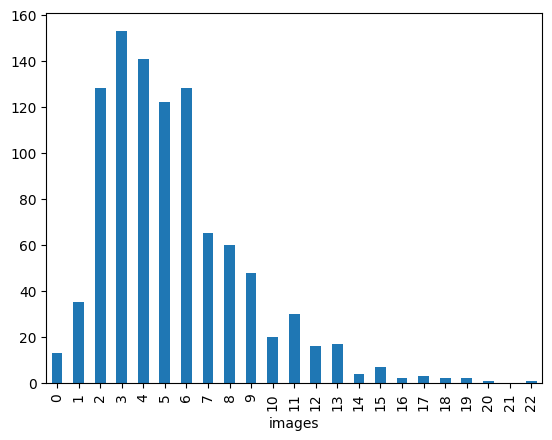

In [13]:
import re

image_counts = prod_df.images.map(lambda x: len([k for k in x.keys() if re.match("^\d+$", k)]) if isinstance(x, dict) else 0)
idx = range(image_counts.min(), image_counts.max())
image_counts.value_counts().reindex(idx, fill_value=0).plot.bar();

In [14]:
prod_df.selected_images.notna().value_counts()

selected_images
True     987
False     13
Name: count, dtype: int64

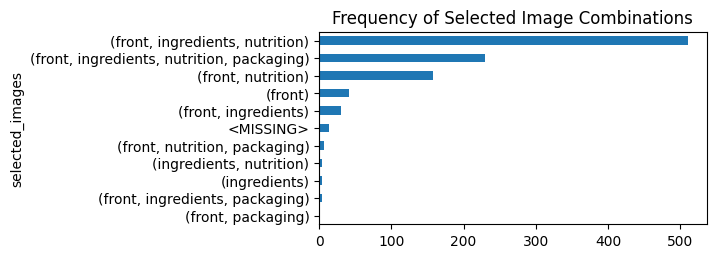

In [15]:
data = prod_df.selected_images.map(lambda x: x.keys() if isinstance(x, dict) else "<MISSING>").value_counts(dropna=False, ascending=True)
data.plot.barh(figsize=(5,2.5), title="Frequency of Selected Image Combinations");

In [16]:
img_df = prod_df.selected_images[lambda x: x.notna()]
dims = ['type', 'lang']

df = pd.DataFrame([(type, lang) for img in img_df for type in img.keys() for lang in img[type]['display'].keys()], columns=dims)
matrix = df.groupby(dims).size().unstack(fill_value=0)

print("Product Images / Language")
matrix['total'] = matrix.sum(axis=1)
pd.concat([matrix, matrix.sum(axis=0).to_frame("total").transpose()])

Product Images / Language


lang,ar,bg,de,en,es,fa,fr,it,pl,pt,sv,uk,xx,total
front,1,0,925,116,6,1,78,1,1,1,0,1,1,1132
ingredients,1,2,753,43,4,1,69,0,1,0,0,0,0,874
nutrition,1,0,855,83,7,0,26,1,1,1,1,0,1,977
packaging,1,1,230,9,0,0,0,0,0,0,0,0,0,241
total,4,3,2763,251,17,2,173,2,3,2,1,1,2,3224


In [17]:
import re

def get_image_url(product_data, image_name, resolution="full"):
    if image_name not in product_data["images"]:
        return None
    base_url = "https://images.openfoodfacts.org/images/products"
    # get product folder name
    folder_name = product_data["code"]
    if len(folder_name) > 8:
        folder_name = re.sub(r'(...)(...)(...)(.*)', r'\1/\2/\3/\4', folder_name)
    # get filename
    if re.match("^\d+$", image_name):  # only digits
        # raw image
        resolution_suffix = "" if resolution == "full" else f".{resolution}"
        filename = f"{image_name}{resolution_suffix}.jpg"
    else:
        # selected image
        rev = product_data["images"][image_name]["rev"]
        filename = f"{image_name}.{rev}.{resolution}.jpg"
    # join things together
    return f"{base_url}/{folder_name}/{filename}"

def get_product_data(df: pd.DataFrame, code: str):
    return dict(df.reset_index()[lambda x: x.code == code].iloc[0])

code = '4311596479696'

get_image_url(get_product_data(prod_df, code), "1")

'https://images.openfoodfacts.org/images/products/431/159/647/9696/1.jpg'

In [18]:
print(json.dumps(prod_df.loc['4311596479696'].images, indent=2))

{
  "1": {
    "sizes": {
      "100": {
        "h": 100,
        "w": 75
      },
      "400": {
        "h": 400,
        "w": 300
      },
      "full": {
        "h": 1333,
        "w": 1000
      }
    },
    "uploaded_t": "1471716843",
    "uploader": "date-limite-app"
  },
  "10": {
    "sizes": {
      "100": {
        "h": 100,
        "w": 58
      },
      "400": {
        "h": 400,
        "w": 233
      },
      "full": {
        "h": 1200,
        "w": 699
      }
    },
    "uploaded_t": 1667061245,
    "uploader": "kiliweb"
  },
  "2": {
    "sizes": {
      "100": {
        "h": 100,
        "w": 75
      },
      "400": {
        "h": 400,
        "w": 300
      },
      "full": {
        "h": 400,
        "w": 300
      }
    },
    "uploaded_t": 1567588121,
    "uploader": "date-limite-app"
  },
  "3": {
    "sizes": {
      "100": {
        "h": 100,
        "w": 75
      },
      "400": {
        "h": 400,
        "w": 300
      },
      "full": {
        "h": 40

In [19]:
code = '4311596479696'
urls = {key:get_image_url(get_product_data(prod_df, code), key, resolution="400") for key in prod_df.loc[code].image_keys}
urls

{'1': 'https://images.openfoodfacts.org/images/products/431/159/647/9696/1.400.jpg',
 '10': 'https://images.openfoodfacts.org/images/products/431/159/647/9696/10.400.jpg',
 '2': 'https://images.openfoodfacts.org/images/products/431/159/647/9696/2.400.jpg',
 '3': 'https://images.openfoodfacts.org/images/products/431/159/647/9696/3.400.jpg',
 '4': 'https://images.openfoodfacts.org/images/products/431/159/647/9696/4.400.jpg',
 '5': 'https://images.openfoodfacts.org/images/products/431/159/647/9696/5.400.jpg',
 '6': 'https://images.openfoodfacts.org/images/products/431/159/647/9696/6.400.jpg',
 '7': 'https://images.openfoodfacts.org/images/products/431/159/647/9696/7.400.jpg',
 '8': 'https://images.openfoodfacts.org/images/products/431/159/647/9696/8.400.jpg',
 '9': 'https://images.openfoodfacts.org/images/products/431/159/647/9696/9.400.jpg',
 'front_de': 'https://images.openfoodfacts.org/images/products/431/159/647/9696/front_de.75.400.jpg',
 'front_fr': 'https://images.openfoodfacts.org

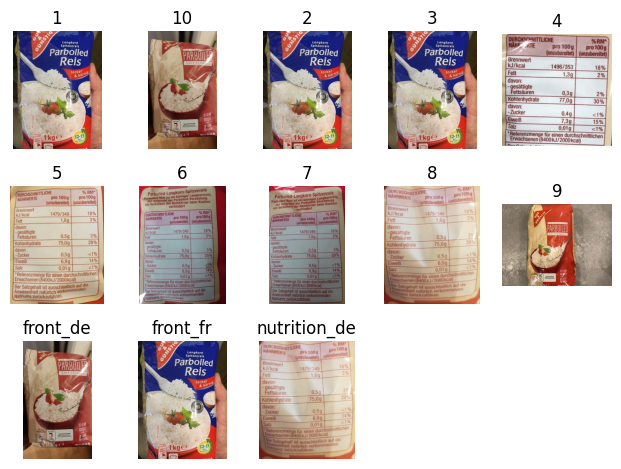

In [20]:
import PIL.Image
import numpy as np

n = len(urls)
cols = 5

rows = math.ceil(n/cols)

fig, axs = plt.subplots(rows, cols)

for i, ax in enumerate(axs.flat):

    if i >= n:
        ax.set_axis_off()
        continue

    url = list(urls.values())[i]

    ax.set_title(list(urls.keys())[i])
    ax.set_frame_on(False)
    ax.set_xticks([])
    ax.set_yticks([])

    with urlopen(url) as response:
        im = PIL.Image.open(response)
        im = np.array(im)
        ax.imshow(im)

fig.tight_layout()